In [ ]:
lore = """The main characters of the series are the "Family", a group of kids led by Seiko dealing with the supernatural.
The members of the Family who also attend high school at Kami High are also members of the History and Culture Research Club , which serves as a front for their activities.

Momo Ayase
Voiced by: Shion Wakayama
A gyaru high school girl who believes in ghosts and the supernatural.
After being abducted by Serpo aliens, she discovers she has psychokinetic powers, allowing her to visualize the "auras" of people and objects, and visualizes her power as giant hands to "grab" and control these auras.
Because she has a crush on the actor Ken Takakura, she refuses to call Okarun by his real name because he does not look anything like him.
Although initially not getting along and constantly arguing and fighting with each other, after defeating Turbo Granny, they become close friends and throughout the course of the story, she develops strong feelings for Okarun.

Ken Takakura / Okarun
Voiced by: Natsuki Hanae
A shy and friendless high school boy who tries to connect with Momo over their shared interests in the supernatural.
She calls him "Okarun" from "occult", since he shares a name with the actor Ken Takakura, her celebrity crush.
After being possessed by the Turbo Granny, Okarun gains the ability to enter a powerful demonic state, granting him immense speed but also a suave yet lethargic alternate personality. He values and cares a lot about his friendship with Momo and throughout the course of the story, he realizes he is in love with Momo, eventually confessing to her.

Seiko Ayase
Voiced by: Nana Mizuki
A spirit medium and Momo's grandmother, whom she lives with, despite appearing to be in her 20s.
She helps Momo and Okarun deal with dangerous spirits and yōkai.
Though she has no innate powers, she has an extensive knowledge of supernatural entities and curses, and uses various artifacts and the borrowed power of the god residing in their city to seal and exorcise yōkai, though this power is only limited to the city itself.
She has a brash personality, much to the chagrin of those around her, but deeply cares for her loved ones including Momo.

Turbo Granny
Voiced by: Mayumi Tanaka
A yōkai who takes the form of a cruel, foul-mouthed elderly woman, Turbo Granny used to comfort the spirits of girls who died horrible deaths, but started cursing and stealing the genitals of anyone who entered her territory.
After Momo and Okarun defeat her, Seiko seals her spirit inside a maneki-neko doll, and she agrees to aid Okarun and Momo in finding Okarun's testicles, in exchange for receiving her powers back.
Aira Shiratori
Voiced by: Ayane Sakura
The school idol of Kami High.
Although she puts on the appearance of a ditzy and amiable person, she is actually incredibly vain and boasts a Messiah complex, a direct result of her inability to reconcile with the death of her mother at a young age.
After obtaining one of Okarun's kintama, Aira reawakened her suppressed ability to see the supernatural, which coupled with her egomania, led her to believe that she was divinely chosen to exorcise yōkai and thus targets Momo, delusionally believing her and Okarun to be malevolent demons.
The resulting confrontation culminated in her absorbing Acrobatic Silky's powers, giving her a similar transformation to Okarun as well as immense agility and prehensile hair.
Aira subsequently allies with Momo and Okarun despite still thinking they are demons, and becomes openly affectionate towards Okarun for his selfless nature.
"""

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts([lore])

In [ ]:
len(tokenizer.word_index)

302

In [ ]:
input_seq = []
for sentence in lore.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(len(tokenized_sentence)):
    n_gram = tokenized_sentence[:i+1]
    input_seq.append(n_gram)

In [ ]:
max_len = max([len(x) for x in input_seq])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded_in_seq=pad_sequences(input_seq, maxlen = max_len, padding = 'pre')

In [ ]:
X = padded_in_seq[:,:-1]
y = padded_in_seq[:,-1]

In [ ]:
"""
This may seem like a regression problem at first, but all the outputs are discrete, and any float value will not have any meaning (for eg for X=[12 3] y = 1 but the y_hat = 1.2 then the prediction maps to no word in our vocabulary denoted by numbers. Hence this is a classification problem that too multi-class, we will OHE the y values and then predict the probabilities of all outcomes, softmax it to find the y_pred)"""

'\nThis may seem like a regression problem at first, but all the outputs are discrete, and any float value will not have any meaning (for eg for X=[12 3] y = 1 but the y_hat = 1.2 then the prediction maps to no word in our vocabulary denoted by numbers. Hence this is a classification problem that too multi-class, we will OHE the y values and then predict the probabilities of all outcomes, softmax it to find the y_pred)'

In [ ]:
X.shape

(596, 58)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=len(tokenizer.word_index)+1)

In [ ]:
len(tokenizer.word_index)+1

303

In [ ]:
y.shape

(596, 303)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

In [ ]:
#1 embedding layer
#1 Dense Layer
#1 output layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, BatchNormalization, SimpleRNN, GRU

In [ ]:
import tensorflow as tf
import keras.backend as K

def perplexity(y_true, y_pred):
    cross_entropy = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    return tf.exp(tf.reduce_mean(cross_entropy))


In [ ]:
best_model_1 = Sequential()
# Build model
best_model_1.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=200))
best_model_1.add(SimpleRNN(25, return_sequences=True))
best_model_1.add(BatchNormalization())
best_model_1.add(Dropout(0.3))
best_model_1.add(SimpleRNN(25))
best_model_1.add(BatchNormalization())
best_model_1.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile
best_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000492694559995156),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',perplexity])

In [ ]:
history = best_model_1.fit(X_train, y_train,
                         epochs=100,
                         validation_data=(X_test, y_test),
                         batch_size=32)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.0014 - loss: 5.7984 - perplexity: 330.4437 - val_accuracy: 0.0000e+00 - val_loss: 5.7098 - val_perplexity: 302.1606
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0106 - loss: 5.6238 - perplexity: 277.4241 - val_accuracy: 0.0000e+00 - val_loss: 5.7018 - val_perplexity: 299.6382
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.0248 - loss: 5.5271 - perplexity: 251.6123 - val_accuracy: 0.0083 - val_loss: 5.6956 - val_perplexity: 297.7170
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.0389 - loss: 5.4532 - perplexity: 233.8155 - val_accuracy: 0.0250 - val_loss: 5.6917 - val_perplexity: 296.5738
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0521 - loss: 5.3858 - perplexity: 218.6455 - val_accuracy: 0.0250 - val_loss: 5.6871 - val_perplexity: 295.1369
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.0665 - loss: 5.3015 - perplexity: 20

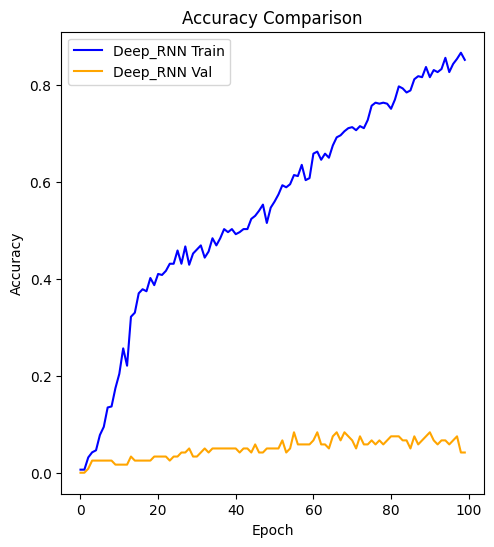

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training accuracy for all models
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Deep_RNN Train', color='blue')
plt.plot(history.history['val_accuracy'], label='Deep_RNN Val', color='orange')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
text = "Momo"
for i in range(15):
  token_txt = tokenizer.texts_to_sequences([text])[0]
  padded_inp=pad_sequences([token_txt], maxlen = max_len, padding = 'pre')
  pos = np.argmax(best_model_1.predict(padded_inp))
  for word , index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Momo and
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Momo and okarun
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Momo and okarun supernatural
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Momo and okarun supernatural supernatural
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Momo and okarun supernatural supernatural she
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Momo and okarun supernatural supernatural she is
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Momo and okarun supernatural supernatural she is elderly
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Momo and okarun supernatural supernatural she is elderly woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Momo and okarun supernatural supernatural she is elderly woman turbo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Momo and okarun supernatural supernatural she is elderly woman turbo granny
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Momo and okarun supernatural supernatural she is elderly woman turbo granny used
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Momo a

In [ ]:
best_model_2 = Sequential()
# Build model
best_model_2.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=200))
best_model_2.add(LSTM(192, return_sequences=True))
best_model_2.add(BatchNormalization())
best_model_2.add(Dropout(0.5))
best_model_2.add(LSTM(192))
best_model_2.add(BatchNormalization())
best_model_2.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile
best_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000492694559995156),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',perplexity])

In [ ]:
history = best_model_2.fit(X_train, y_train,
                         epochs=30,
                         validation_data=(X_test, y_test),
                         batch_size=32)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 427ms/step - accuracy: 0.0013 - loss: 5.9138 - perplexity: 373.0992 - val_accuracy: 0.0167 - val_loss: 5.7054 - val_perplexity: 300.4785
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 485ms/step - accuracy: 0.0211 - loss: 5.4051 - perplexity: 223.3445 - val_accuracy: 0.0000e+00 - val_loss: 5.6985 - val_perplexity: 298.4489
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.0700 - loss: 4.9967 - perplexity: 149.0269 - val_accuracy: 0.0000e+00 - val_loss: 5.6976 - val_perplexity: 298.3996
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - accuracy: 0.1131 - loss: 4.6372 - perplexity: 105.3134 - val_accuracy: 0.0167 - val_loss: 5.6991 - val_perplexity: 298.9889
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 514ms/step - accuracy: 0.1858 - loss: 4.1053 - perplexity: 60.8828 - val_accuracy: 0.0083 - val_loss: 5.7040 - val_perplexity: 300.4990
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.2423 - loss: 3.6052 - perplexity: 

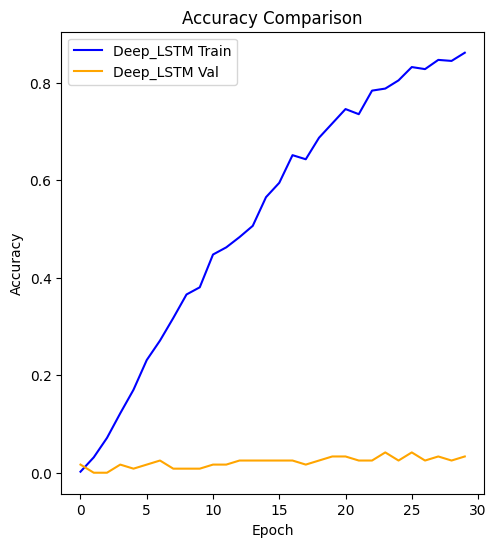

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training accuracy for all models
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Deep_LSTM Train', color='blue')
plt.plot(history.history['val_accuracy'], label='Deep_LSTM Val', color='orange')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
text = "Momo"
for i in range(15):
  token_txt = tokenizer.texts_to_sequences([text])[0]
  padded_inp=pad_sequences([token_txt], maxlen = max_len, padding = 'pre')
  pos = np.argmax(best_model_2.predict(padded_inp))
  for word , index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Momo the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Momo the ayase
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Momo the ayase of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Momo the ayase of the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Momo the ayase of the her
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Momo the ayase of the her to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Momo the ayase of the her to the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Momo the ayase of the her to the with
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Momo the ayase of the her to the with resulting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Momo the ayase of the her to the with resulting confrontation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Momo the ayase of the her to the with resulting confrontation culminated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Momo the ayase of the her to the with resulting confrontation culminated her
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Momo the ayase of the her to the with resulting confron

In [ ]:
best_model_3 = Sequential()

# Build model
best_model_3.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                           output_dim=200))
best_model_3.add(GRU(192, return_sequences=True))
best_model_3.add(BatchNormalization())
best_model_3.add(Dropout(0.5))
best_model_3.add(GRU(192))
best_model_3.add(BatchNormalization())
best_model_3.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile
best_model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000492694559995156),
                     loss='categorical_crossentropy',
                     metrics=['accuracy',perplexity])


In [ ]:
history = best_model_3.fit(X_train, y_train,
                         epochs=30,
                         validation_data=(X_test, y_test),
                         batch_size=32)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step - accuracy: 0.0103 - loss: 6.0178 - perplexity: 412.6932 - val_accuracy: 0.0000e+00 - val_loss: 5.7121 - val_perplexity: 302.5310
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.0596 - loss: 5.2881 - perplexity: 199.7397 - val_accuracy: 0.0083 - val_loss: 5.7064 - val_perplexity: 300.9471
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 315ms/step - accuracy: 0.1326 - loss: 4.8874 - perplexity: 134.5948 - val_accuracy: 0.0000e+00 - val_loss: 5.7037 - val_perplexity: 300.3665
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.2143 - loss: 4.2746 - perplexity: 73.3769 - val_accuracy: 0.0000e+00 - val_loss: 5.7066 - val_perplexity: 301.4034
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.3703 - loss: 3.6279 - perplexity: 38.0529 - val_accuracy: 0.0083 - val_loss: 5.7076 - val_perplexity: 301.8449
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - accuracy: 0.4388 - loss: 3.1223 - perplexity

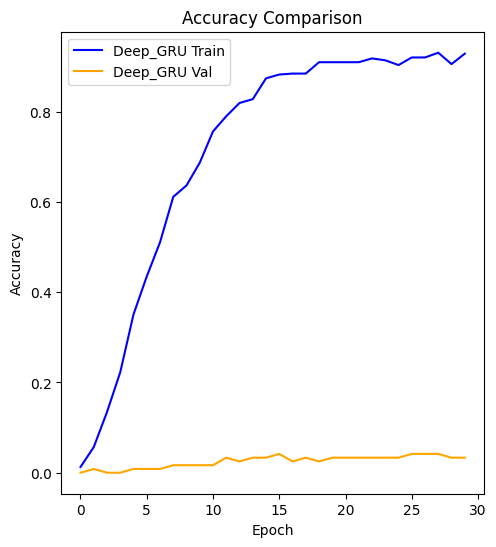

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training accuracy for all models
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Deep_GRU Train', color='blue')
plt.plot(history.history['val_accuracy'], label='Deep_GRU Val', color='orange')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
text = "Momo"
for i in range(15):
  token_txt = tokenizer.texts_to_sequences([text])[0]
  padded_inp=pad_sequences([token_txt], maxlen = max_len, padding = 'pre')
  pos = np.argmax(best_model_2.predict(padded_inp))
  for word , index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Momo the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Momo the ayase
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Momo the ayase of
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Momo the ayase of the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Momo the ayase of the her
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Momo the ayase of the her to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Momo the ayase of the her to the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Momo the ayase of the her to the with
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Momo the ayase of the her to the with resulting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Momo the ayase of the her to the with resulting confrontation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Momo the ayase of the her to the with resulting confrontation culminated
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Momo the ayase of the her to the with resulting confrontation culminated her
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Momo the ayase of the her to the with resulting confront